<a href="https://colab.research.google.com/github/christophermalone/DSCI325/blob/main/Module2_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2 | Part 3: Pre-Processing Multiple Data Files

This notebook will discuss processes for the pre-processing of multiple data files.  BASH is a language that can be used to process a collection or series of commands for processing data files.  The collection of commands are often referred to as a (shell) script. 

BASH Wiki Page: https://en.wikipedia.org/wiki/Bash_(Unix_shell) 

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

### Example 2.3.1
For this example, data from a well established bike rental company in New York City will be used.  The goal of this investigation is to compare the number of bike rentals near Central Park for tourists on summer holidays (Memorial Day, Independence Day, and Labor Day) over the last three years (2018/2019/2020).

*   Only <strong>Customers</strong>, i.e. tourists, should be used in this investigation.
*   Only rentals from bike stations near <strong>Central Park</strong> should be used in this investigation, i.e. bike rentals whose station name includes the words Central Park



<p align='center'>
<table border='1'>
<tr>
  <td bgcolor='lightgrey' align='center'><font size="2">Holiday</font></td>
  <td bgcolor='lightgrey' align='center'><font size="2">2018</font></td>
  <td bgcolor='lightgrey' align='center'><font size="2">2019</font></td>
  <td bgcolor='lightgrey' align='center'><font size="2">2020</font></td>
</tr>
<tr>
  <td align='center'><font size="2">Memorial<br>Day</font></td>
  <td align='center'><font size="2">May 28</font></td>
  <td align='center'><font size="2">May 27</font></td>
  <td align='center'><font size="2">May 25</font></td>
</tr>
<tr>
  <td align='center'><font size="2">Independence<br>Day</font></td>
  <td align='center'><font size="2">July 4</font></td>
  <td align='center'><font size="2">July 4</font></td>
  <td align='center'><font size="2">July 4</font></td>
</tr>
<tr>
  <td align='center'><font size="2">Labor<br>Day</font></td>
  <td align='center'><font size="2">Sept 3</font></td>
  <td align='center'><font size="2">Sept 2</font></td>
  <td align='center'><font size="2">Sept 7</font></td>
</tr>

</table>
</p>

 
<i>CitiBike Web site</i>: https://www.citibikenyc.com/system-data
<br><i>Data Source</i>: https://s3.amazonaws.com/tripdata/index.html 

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

A graph analogous to the one shown here is the desired output from this investigation.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1tqb7um1SF7maIrBwp5ybMTMilwDwI4rw"></p>

## Pre-Processing with BASH - Downloading Files

BASH can be used to run a set of commands for the processing of data.  The series of commands are placed into a script or shell script.  The following code will create a file called Download_CitiBikeData.sh.  Each command here uses the wget function to download files from the internet.  The echo command simply instructs BASH to write the contents contained within quoted string to the file being created.  Notice that this series of commands are bracketed with the {} so that all echo lines are written to file.

In [56]:
#Create a file that contains a set of commands to download file
%%bash
{  
 echo 'wget -O  /content/sample_data/May2018.zip https://s3.amazonaws.com/tripdata/201805-citibike-tripdata.csv.zip'
 echo 'wget -O  /content/sample_data/July2018.zip https://s3.amazonaws.com/tripdata/201807-citibike-tripdata.csv.zip'
 echo 'wget -O /content/sample_data/September2018.zip https://s3.amazonaws.com/tripdata/201809-citibike-tripdata.csv.zip' 
 echo 'wget -O  /content/sample_data/May2019.zip https://s3.amazonaws.com/tripdata/201905-citibike-tripdata.csv.zip'
 echo 'wget -O  /content/sample_data/July2019.zip https://s3.amazonaws.com/tripdata/201907-citibike-tripdata.csv.zip'
 echo 'wget -O /content/sample_data/September2019.zip https://s3.amazonaws.com/tripdata/201909-citibike-tripdata.csv.zip'
 echo 'wget -O  /content/sample_data/May2020.zip https://s3.amazonaws.com/tripdata/202005-citibike-tripdata.csv.zip'
 echo 'wget -O  /content/sample_data/July2020.zip https://s3.amazonaws.com/tripdata/202007-citibike-tripdata.csv.zip'
 echo 'wget -O /content/sample_data/September2020.zip https://s3.amazonaws.com/tripdata/202009-citibike-tripdata.csv.zip'
 } > Download_CitiBikeData.sh

Next, verify that the contents of the file is correct.

In [60]:
!head -n 10 /content/Download_CitiBikeData.sh

wget -O  /content/sample_data/May2018.zip https://s3.amazonaws.com/tripdata/201805-citibike-tripdata.csv.zip
wget -O  /content/sample_data/July2018.zip https://s3.amazonaws.com/tripdata/201807-citibike-tripdata.csv.zip
wget -O /content/sample_data/September2018.zip https://s3.amazonaws.com/tripdata/201809-citibike-tripdata.csv.zip
wget -O  /content/sample_data/May2019.zip https://s3.amazonaws.com/tripdata/201905-citibike-tripdata.csv.zip
wget -O  /content/sample_data/July2019.zip https://s3.amazonaws.com/tripdata/201907-citibike-tripdata.csv.zip
wget -O /content/sample_data/September2019.zip https://s3.amazonaws.com/tripdata/201909-citibike-tripdata.csv.zip
wget -O  /content/sample_data/May2020.zip https://s3.amazonaws.com/tripdata/202005-citibike-tripdata.csv.zip
wget -O  /content/sample_data/July2020.zip https://s3.amazonaws.com/tripdata/202007-citibike-tripdata.csv.zip
wget -O /content/sample_data/September2020.zip https://s3.amazonaws.com/tripdata/202009-citibike-tripdata.csv.zip


In [57]:
#Verify that the file exists in the /content/ folder!ls /content/

Download_CitiBikeData.sh  sample_data


The following code block will 'run' or execute the lines of code within the script file.   

In [ ]:
%%bash
bash Download_CitiBikeData.sh

Again, let us verify that the wget commands were sucessfully executed.  There should be several *.zip files -- one for each year and summer holiday.

In [6]:
#View the contents in the content folder
!ls /content/sample_data/

August2018.zip	August2020.zip	July2019.zip  June2018.zip  June2020.zip
August2019.zip	July2018.zip	July2020.zip  June2019.zip


## Pre-Processing with BASH - Unzipping Files

The next step in the process is to create another script file that contains the commands needed to unzip each of the downloaded files.  Here, the name of the script file is Unzip_CitiBikeData.sh.

In [59]:
%%bash
{   
 echo 'unzip -o /content/sample_data/May2018.zip -d "/content/sample_data"'
 echo 'unzip -o /content/sample_data/July2018.zip -d "/content/sample_data"'
 echo 'unzip -o /content/sample_data/September2018.zip -d "/content/sample_data"'
 echo 'unzip -o /content/sample_data/May2019.zip -d "/content/sample_data"'
 echo 'unzip -o /content/sample_data/July2019.zip -d "/content/sample_data"'
 echo 'unzip -o /content/sample_data/September2019.zip -d "/content/sample_data"'
 echo 'unzip -o /content/sample_data/May2020.zip -d "/content/sample_data"'
 echo 'unzip -o /content/sample_data/July2020.zip -d "/content/sample_data"'
 echo 'unzip -o /content/sample_data/September2020.zip -d "/content/sample_data"'
 } > Unzip_CitiBikeData.sh

Verify that the contents of the Unzip_CitiBikeData shell file is correct.

In [61]:
!head -n 10 /content/Unzip_CitiBikeData.sh

unzip -o /content/sample_data/May2018.zip -d "/content/sample_data"
unzip -o /content/sample_data/July2018.zip -d "/content/sample_data"
unzip -o /content/sample_data/September2018.zip -d "/content/sample_data"
unzip -o /content/sample_data/May2019.zip -d "/content/sample_data"
unzip -o /content/sample_data/July2019.zip -d "/content/sample_data"
unzip -o /content/sample_data/September2019.zip -d "/content/sample_data"
unzip -o /content/sample_data/May2020.zip -d "/content/sample_data"
unzip -o /content/sample_data/July2020.zip -d "/content/sample_data"
unzip -o /content/sample_data/September2020.zip -d "/content/sample_data"


After a script file has been created to unzip each file, execute the lines of code using the following command.

In [62]:
%%bash
bash Unzip_CitiBikeData.sh

Archive:  /content/sample_data/May2018.zip
  inflating: /content/sample_data/201805-citibike-tripdata.csv  
Archive:  /content/sample_data/July2018.zip
  inflating: /content/sample_data/201807-citibike-tripdata.csv  
Archive:  /content/sample_data/September2018.zip
  inflating: /content/sample_data/201809-citibike-tripdata.csv  
Archive:  /content/sample_data/May2019.zip
  inflating: /content/sample_data/201905-citibike-tripdata.csv  
Archive:  /content/sample_data/July2019.zip
  inflating: /content/sample_data/201907-citibike-tripdata.csv  
Archive:  /content/sample_data/September2019.zip
  inflating: /content/sample_data/201909-citibike-tripdata.csv  
Archive:  /content/sample_data/May2020.zip
  inflating: /content/sample_data/202005-citibike-tripdata.csv  
Archive:  /content/sample_data/July2020.zip
  inflating: /content/sample_data/202007-citibike-tripdata.csv  
Archive:  /content/sample_data/September2020.zip
  inflating: /content/sample_data/202009-citibike-tripdata.csv  


Once again, verify that each has been sucessfully unzipped.

In [63]:
#View the contents in the content folder
!ls -l /content/sample_data/

total 4127544
-rw-r--r-- 1 root root 346788777 Sep  6  2018 201805-citibike-tripdata.csv
-rw-r--r-- 1 root root 364208046 Sep  6  2018 201807-citibike-tripdata.csv
-rw-r--r-- 1 root root 357819814 Oct  3  2018 201809-citibike-tripdata.csv
-rw-r--r-- 1 root root 367008111 Jun 11  2019 201905-citibike-tripdata.csv
-rw-r--r-- 1 root root 415266713 Aug  5  2019 201907-citibike-tripdata.csv
-rw-r--r-- 1 root root 464421401 Oct 11  2019 201909-citibike-tripdata.csv
-rw-r--r-- 1 root root 283682921 Jun  5  2020 202005-citibike-tripdata.csv
-rw-r--r-- 1 root root 399626762 Aug 12 01:42 202007-citibike-tripdata.csv
-rw-r--r-- 1 root root 472984200 Oct 13 19:23 202009-citibike-tripdata.csv
-rw-r--r-- 1 root root  63141848 Sep  6  2018 July2018.zip
-rw-r--r-- 1 root root  93359147 Aug  5  2019 July2019.zip
-rw-r--r-- 1 root root  94091098 Aug 12 02:13 July2020.zip
drwxrwxr-x 2 root root      4096 Jul  6  2020 __MACOSX
-rw-r--r-- 1 root root  60398070 Sep  6  2018 May2018.zip
-rw-r--r-- 1 root roo

## Pre-Processing of Data Files - GREP

The following command can be used to get the number of lines across all *.csv files.

In [64]:
!awk 'END{ print NR }' /content/sample_data/*.csv

18248678


An alternative to AWK is the use the <strong>!wc</strong> utility function.  The word count function has an -l option (the letter l, not 1) that can be used to count lines in a file.  This alternative is faster than AWK and it provides more details.

In [65]:
!wc -l /content/sample_data/*.csv

   1824711 /content/sample_data/201805-citibike-tripdata.csv
   1913626 /content/sample_data/201807-citibike-tripdata.csv
   1877885 /content/sample_data/201809-citibike-tripdata.csv
   1924564 /content/sample_data/201905-citibike-tripdata.csv
   2181065 /content/sample_data/201907-citibike-tripdata.csv
   2444901 /content/sample_data/201909-citibike-tripdata.csv
   1487891 /content/sample_data/202005-citibike-tripdata.csv
   2105809 /content/sample_data/202007-citibike-tripdata.csv
   2488226 /content/sample_data/202009-citibike-tripdata.csv
  18248678 total


GREP is yet another command-line procedure for searching plain-text in data files that match a partipular expression.  GREP uses regular expression syntax when doing its searching. 

Wiki Entry for GREP: https://en.wikipedia.org/wiki/Grep 

The following <strong>!grep</strong> command will find all rows for which the word Customer is present.  The output from this search will be placed into a file named Customer.csv in the /content/sample_data/ folder.

In [77]:
!grep 'Customer' /content/sample_data/*.csv > /content/sample_data/Customer.csv

Next, get all the lines in Customer.csv file that have <strong>Central Park</strong> contained in either in the Start Station or End Station fields.

In [78]:
!grep 'Central Park' /content/sample_data/Customer.csv > /content/sample_data/Customer_CentralPark.csv

A check of the number of records in the Customer_CentralPark.csv file. 

In [79]:
!wc -l /content/sample_data/Customer_CentralPark.csv

358715 /content/sample_data/Customer_CentralPark.csv


The two-step processing done above using !grep can be done with in a single step.  The syntax for the grep command must be modified so that a logicial <strong>AND</strong> is implemented.  This is accomplished through the use of the .* syntax.

In [81]:
#Using the AND syntax with grep
!grep 'Central Park.*Customer' /content/sample_data/*.csv > /content/sample_data/Customer_CentralPark_v2.csv

Verify that the grep functions was successfully executed.

In [83]:
!wc -l /content/sample_data/Customer_CentralPark_v2.csv

1076145 /content/sample_data/Customer_CentralPark_v2.csv


Notice that this version contains too many lines (does not match the grep command that was done above with the two-steps).

In [84]:
!ls -l /content/sample_data/

total 5353516
-rw-r--r-- 1 root root 346788777 Sep  6  2018 201805-citibike-tripdata.csv
-rw-r--r-- 1 root root 364208046 Sep  6  2018 201807-citibike-tripdata.csv
-rw-r--r-- 1 root root 357819814 Oct  3  2018 201809-citibike-tripdata.csv
-rw-r--r-- 1 root root 367008111 Jun 11  2019 201905-citibike-tripdata.csv
-rw-r--r-- 1 root root 415266713 Aug  5  2019 201907-citibike-tripdata.csv
-rw-r--r-- 1 root root 464421401 Oct 11  2019 201909-citibike-tripdata.csv
-rw-r--r-- 1 root root 283682921 Jun  5  2020 202005-citibike-tripdata.csv
-rw-r--r-- 1 root root 399626762 Aug 12 01:42 202007-citibike-tripdata.csv
-rw-r--r-- 1 root root 472984200 Oct 13 19:23 202009-citibike-tripdata.csv
-rw-r--r-- 1 root root  89576977 Feb  2 16:27 Customer_CentralPark.csv
-rw-r--r-- 1 root root 297428131 Feb  2 16:27 Customer_CentralPark_v2.csv
-rw-r--r-- 1 root root 868379340 Feb  2 16:26 Customer.csv
-rw-r--r-- 1 root root  63141848 Sep  6  2018 July2018.zip
-rw-r--r-- 1 root root  93359147 Aug  5  2019 Ju

The *.csv wildcard inadvertly included the Customer_CentralPark.csv file.  The grep command should only be run through the orginal data files.  The followind modification solves this problem.

In [85]:
!grep 'Central Park.*Customer' /content/sample_data/*-tripdata.csv > /content/sample_data/Customer_CentralPark_v2.csv

Verify that the contents of this file matches that of what was done in the two-step process of filtering down to Customers and station locations near Central Park.

In [87]:
!wc -l /content/sample_data/Customer_CentralPark_v2.csv

358715 /content/sample_data/Customer_CentralPark_v2.csv


Notice that the files are teh same exact size which may provide evidence they match.

In [86]:
!ls -l /content/sample_data/Customer_CentralPark*

-rw-r--r-- 1 root root 89576977 Feb  2 16:27 /content/sample_data/Customer_CentralPark.csv
-rw-r--r-- 1 root root 89576977 Feb  2 16:29 /content/sample_data/Customer_CentralPark_v2.csv


The </strong>!diff</strong> command is a more formal method to compare the contents of two files.  The output returned is empty which indicates that the two files match.


In [26]:
!diff /content/sample_data/Customer_CentralPark_v2.csv /content/sample_data/Customer_CentralPark.csv

371630,1114887d371629
< /content/sample_data/Customer_CentralPark.csv:/content/sample_data/201806-citibike-tripdata.csv:2042,"2018-06-03 17:04:53.4320","2018-06-03 17:38:56.0580",72,"W 52 St & 11 Ave",40.76727216,-73.99392888,3160,"Central Park West & W 76 St",40.77896784,-73.97374737,28746,"Customer",1992,1
< /content/sample_data/Customer_CentralPark.csv:/content/sample_data/201806-citibike-tripdata.csv:1777,"2018-06-03 17:09:23.6020","2018-06-03 17:39:01.2470",72,"W 52 St & 11 Ave",40.76727216,-73.99392888,3160,"Central Park West & W 76 St",40.77896784,-73.97374737,28593,"Customer",1995,1
< /content/sample_data/Customer_CentralPark.csv:/content/sample_data/201806-citibike-tripdata.csv:817,"2018-06-03 18:03:21.6480","2018-06-03 18:16:59.0370",72,"W 52 St & 11 Ave",40.76727216,-73.99392888,2006,"Central Park S & 6 Ave",40.76590936,-73.97634151,30892,"Customer",1969,0
< /content/sample_data/Customer_CentralPark.csv:/content/sample_data/201806-citibike-tripdata.csv:1547,"2018-06-08 16:11

Next, let us try to extract the fourth of July dates using the following command.

In [93]:
!grep '-07-04' /content/sample_data/Customer_CentralPark.csv > /content/sample_data/Customer_CentralPark_Holidays.csv

grep: invalid option -- '-'
Usage: grep [OPTION]... PATTERN [FILE]...
Try 'grep --help' for more information.


The initial dash is causing problems as GREP things this is a command.  We can escapulate character in grep with a backslash as is shown here.

In [98]:
!grep '\-07-04' /content/sample_data/Customer_CentralPark.csv > /content/sample_data/Customer_CentralPark_Holidays.csv

Let us check how many rentals we have for the fourth of July across all three years.

In [99]:
!wc -l /content/sample_data/Customer_CentralPark_Holidays.csv

6074 /content/sample_data/Customer_CentralPark_Holidays.csv


Next, let us get the bike rentals from May 28, 2018.

In [100]:
!grep '2018-05-28' /content/sample_data/Customer_CentralPark.csv > /content/sample_data/Customer_CentralPark_Holidays.csv

Again, a simple count of the records in this file.

In [101]:
!wc -l /content/sample_data/Customer_CentralPark_Holidays.csv

2048 /content/sample_data/Customer_CentralPark_Holidays.csv


The vertical bar "|" is used to represent the logical <strong>OR</strong> with grep.

In [102]:
!grep -E '\-07-04|2018-05-28' /content/sample_data/Customer_CentralPark.csv > /content/sample_data/Customer_CentralPark_Holidays.csv

Verify how many records for July 4 (across all years) and May 28, 2018.

In [103]:
!wc -l /content/sample_data/Customer_CentralPark_Holidays.csv

8122 /content/sample_data/Customer_CentralPark_Holidays.csv


The following grep command can be used to get all the bike rentals across the summer holidays and across the three years.

In [104]:
!grep -E '\-07-04|2018-05-28|2019-05-27|2020-05-25|2018-09-03|2019-09-02|2020-09-07' /content/sample_data/Customer_CentralPark.csv > /content/sample_data/Customer_CentralPark_Holidays.csv

In [105]:
!wc -l /content/sample_data/Customer_CentralPark_Holidays.csv

19724 /content/sample_data/Customer_CentralPark_Holidays.csv


Get a random selection of rows to verify condidtions have been meet

In [106]:
!shuf -n 20 /content/sample_data/Customer_CentralPark_Holidays.csv 

/content/sample_data/201807-citibike-tripdata.csv:1411,"2018-07-04 19:14:06.3150","2018-07-04 19:37:37.9050",3168,"Central Park West & W 85 St",40.78472675,-73.96961715,457,"Broadway & W 58 St",40.76695317,-73.98169333,15047,"Customer",1969,0
/content/sample_data/201905-citibike-tripdata.csv:765,"2019-05-27 08:49:00.8070","2019-05-27 09:01:46.4220",3374,"Central Park North & Adam Clayton Powell Blvd",40.799484,-73.955613,3383,"Cathedral Pkwy & Broadway",40.804213,-73.96699104,15780,"Customer",1986,1
/content/sample_data/202009-citibike-tripdata.csv:9872,"2020-09-07 07:30:08.5970","2020-09-07 10:14:41.5540",3724,"7 Ave & Central Park South",40.7667405590595,-73.9790689945221,3305,"E 91 St & 2 Ave",40.78112229934166,-73.94965589046478,37050,"Customer",1969,0
/content/sample_data/201809-citibike-tripdata.csv:1087,"2018-09-03 13:09:36.3430","2018-09-03 13:27:43.3650",3282,"5 Ave & E 88 St",40.78307,-73.95939,3374,"Central Park North & Adam Clayton Powell Blvd",40.799484,-73.955613,24976,"C

In [112]:
!head -n 1 /content/sample_data/201805-citibike-tripdata.csv > /content/sample_data/Header.csv

Looking at header

In [114]:
!cat /content/sample_data/Header.csv 

"tripduration","starttime","stoptime","start station id","start station name","start station latitude","start station longitude","end station id","end station name","end station latitude","end station longitude","bikeid","usertype","birth year","gender"


Replace all spaces in field names with and underscore

In [133]:
!sed -i '1s/ /_/g' /content/sample_data/Header.csv 

In [134]:
!cat /content/sample_data/Header.csv 

"tripduration","starttime","stoptime","start_station_id","start_station_name","start_station_latitude","start_station_longitude","end_station_id","end_station_name","end_station_latitude","end_station_longitude","bikeid","usertype","birth_year","gender"


Glue to top of Holidays file

In [139]:
!cat /content/sample_data/Header.csv /content/sample_data/Customer_CentralPark_Holidays.csv > /content/sample_data/Customer_CentralPark_Holidays_withHeader.csv 

Did it work?

In [140]:
!head /content/sample_data/Customer_CentralPark_Holidays_withHeader.csv

"tripduration","starttime","stoptime","start_station_id","start_station_name","start_station_latitude","start_station_longitude","end_station_id","end_station_name","end_station_latitude","end_station_longitude","bikeid","usertype","birth_year","gender"
/content/sample_data/201805-citibike-tripdata.csv:1850,"2018-05-28 12:59:49.5320","2018-05-28 13:30:40.0560",72,"W 52 St & 11 Ave",40.76727216,-73.99392888,2006,"Central Park S & 6 Ave",40.76590936,-73.97634151,30028,"Customer",1969,0
/content/sample_data/201805-citibike-tripdata.csv:1513,"2018-05-28 13:27:45.5860","2018-05-28 13:52:58.9950",72,"W 52 St & 11 Ave",40.76727216,-73.99392888,3226,"W 82 St & Central Park West",40.78275,-73.97137,17715,"Customer",1969,0
/content/sample_data/201805-citibike-tripdata.csv:1485,"2018-05-28 13:28:06.1480","2018-05-28 13:52:51.9910",72,"W 52 St & 11 Ave",40.76727216,-73.99392888,3226,"W 82 St & Central Park West",40.78275,-73.97137,21809,"Customer",1969,0
/content/sample_data/201805-citibike-tripda

## Reading data into R

In [107]:
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [123]:
%%R
library(tidyverse)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

R[write to console]: ✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.5     ✔ dplyr   1.0.3
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [141]:
#Read the *.csv file into R; provide names for each field as well
%%R

NYC_Holidays_CitiBikeRentals <- read_csv('/content/sample_data/Customer_CentralPark_Holidays_withHeader.csv')

R[write to console]: 
── Column specification ────────────────────────────────────────────────────────
cols(
  tripduration = col_character(),
  starttime = col_datetime(format = ""),
  stoptime = col_datetime(format = ""),
  start_station_id = col_double(),
  start_station_name = col_character(),
  start_station_latitude = col_double(),
  start_station_longitude = col_double(),
  end_station_id = col_double(),
  end_station_name = col_character(),
  end_station_latitude = col_double(),
  end_station_longitude = col_double(),
  bikeid = col_double(),
  usertype = col_character(),
  birth_year = col_double(),
  gender = col_double()
)




In [142]:
#
%%R

ls()
head(NYC_Holidays_CitiBikeRentals)

# A tibble: 6 x 15
  tripduration starttime           stoptime            start_station_id
  <chr>        <dttm>              <dttm>                         <dbl>
1 /content/sa… 2018-05-28 12:59:49 2018-05-28 13:30:40               72
2 /content/sa… 2018-05-28 13:27:45 2018-05-28 13:52:58               72
3 /content/sa… 2018-05-28 13:28:06 2018-05-28 13:52:51               72
4 /content/sa… 2018-05-28 14:44:56 2018-05-28 15:22:50              128
5 /content/sa… 2018-05-28 14:45:01 2018-05-28 15:22:49              128
6 /content/sa… 2018-05-28 13:27:07 2018-05-28 13:51:16              167
# … with 11 more variables: start_station_name <chr>,
#   start_station_latitude <dbl>, start_station_longitude <dbl>,
#   end_station_id <dbl>, end_station_name <chr>, end_station_latitude <dbl>,
#   end_station_longitude <dbl>, bikeid <dbl>, usertype <chr>,
#   birth_year <dbl>, gender <dbl>


Looking at structure...

In [143]:
%%R
str(NYC_Holidays_CitiBikeRentals)

tibble [19,724 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ tripduration           : chr [1:19724] "/content/sample_data/201805-citibike-tripdata.csv:1850" "/content/sample_data/201805-citibike-tripdata.csv:1513" "/content/sample_data/201805-citibike-tripdata.csv:1485" "/content/sample_data/201805-citibike-tripdata.csv:2274" ...
 $ starttime              : POSIXct[1:19724], format: "2018-05-28 12:59:49" "2018-05-28 13:27:45" ...
 $ stoptime               : POSIXct[1:19724], format: "2018-05-28 13:30:40" "2018-05-28 13:52:58" ...
 $ start_station_id       : num [1:19724] 72 72 72 128 128 167 173 173 173 173 ...
 $ start_station_name     : chr [1:19724] "W 52 St & 11 Ave" "W 52 St & 11 Ave" "W 52 St & 11 Ave" "MacDougal St & Prince St" ...
 $ start_station_latitude : num [1:19724] 40.8 40.8 40.8 40.7 40.7 ...
 $ start_station_longitude: num [1:19724] -74 -74 -74 -74 -74 ...
 $ end_station_id         : num [1:19724] 2006 3226 3226 2006 2006 ...
 $ end_station_name       : chr [1:19724

In [154]:
%%R

NYC_Holidays_CitiBikeRentals$Year <- format(NYC_Holidays_CitiBikeRentals$starttime, format="%Y")
NYC_Holidays_CitiBikeRentals$Month <- format(NYC_Holidays_CitiBikeRentals$starttime, format="%m")

str(NYC_Holidays_CitiBikeRentals)

tibble [19,724 × 17] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ tripduration           : chr [1:19724] "/content/sample_data/201805-citibike-tripdata.csv:1850" "/content/sample_data/201805-citibike-tripdata.csv:1513" "/content/sample_data/201805-citibike-tripdata.csv:1485" "/content/sample_data/201805-citibike-tripdata.csv:2274" ...
 $ starttime              : POSIXct[1:19724], format: "2018-05-28 12:59:49" "2018-05-28 13:27:45" ...
 $ stoptime               : POSIXct[1:19724], format: "2018-05-28 13:30:40" "2018-05-28 13:52:58" ...
 $ start_station_id       : num [1:19724] 72 72 72 128 128 167 173 173 173 173 ...
 $ start_station_name     : chr [1:19724] "W 52 St & 11 Ave" "W 52 St & 11 Ave" "W 52 St & 11 Ave" "MacDougal St & Prince St" ...
 $ start_station_latitude : num [1:19724] 40.8 40.8 40.8 40.7 40.7 ...
 $ start_station_longitude: num [1:19724] -74 -74 -74 -74 -74 ...
 $ end_station_id         : num [1:19724] 2006 3226 3226 2006 2006 ...
 $ end_station_name       : chr [1:19724

## Getting the tallies

In [155]:
%%R

( NYC_Holidays_CitiBikeRentals
  %>% group_by(Year, Month)
  %>% summarise(Count = n())
) -> NYC_Holidays_CitiBikeRentals_Counts

R[write to console]: `summarise()` has grouped output by 'Year'. You can override using the `.groups` argument.



In [157]:
%%R
NYC_Holidays_CitiBikeRentals_Counts

# A tibble: 9 x 3
# Groups:   Year [3]
  Year  Month Count
  <chr> <chr> <int>
1 2018  05     2048
2 2018  07     1750
3 2018  09     2362
4 2019  05     3236
5 2019  07     2220
6 2019  09      970
7 2020  05     2472
8 2020  07     2104
9 2020  09     2562


## Creating the graph

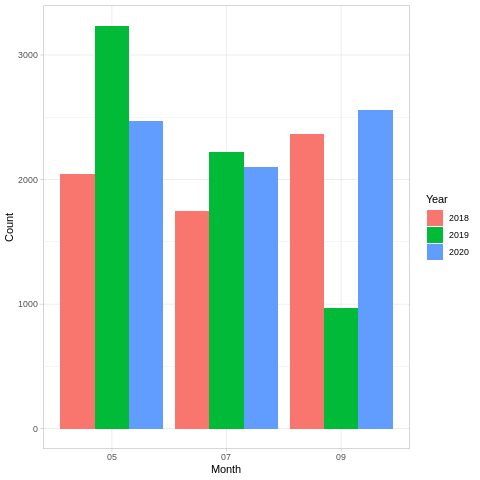

In [201]:
%%R

NYC_Holidays_CitiBikeRentals_Counts %>%
 ggplot(aes(x = Month, y = Count, fill=Year)) +
  geom_col(position='dodge') +
  theme_light()  

In [164]:
%%R
(
NYC_Holidays_CitiBikeRentals_Counts
 %>% mutate(Holiday = case_when(Month == "05" ~ "Memorial Day", Month == "07" ~ "Independence Day", Month == "09" ~ "Labor Day"))
) -> NYC_Holidays_CitiBikeRentals_Counts

head(NYC_Holidays_CitiBikeRentals_Counts)

# A tibble: 6 x 4
# Groups:   Year [2]
  Year  Month Count Holiday         
  <chr> <chr> <int> <chr>           
1 2018  05     2048 Memorial Day    
2 2018  07     1750 Independence Day
3 2018  09     2362 Labor Day       
4 2019  05     3236 Memorial Day    
5 2019  07     2220 Independence Day
6 2019  09      970 Labor Day       


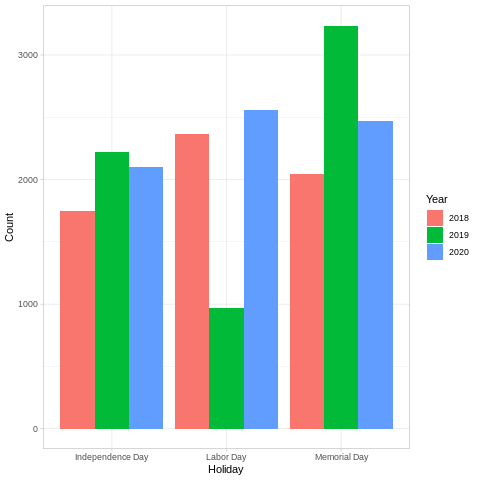

In [202]:
%%R

NYC_Holidays_CitiBikeRentals_Counts %>%
 ggplot(aes(x = Holiday, y = Count, fill=Year)) +
  geom_col(position='dodge') +
  theme_light()  
  

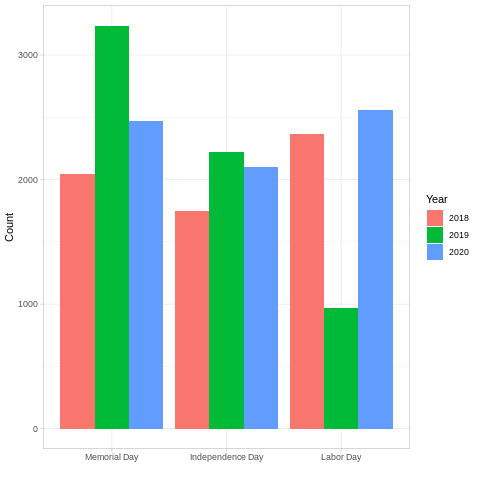

In [205]:
%%R

NYC_Holidays_CitiBikeRentals_Counts %>%
 mutate(Holiday = fct_relevel(Holiday, c("Memorial Day","Independence Day","Labor Day"))) %>%
 ggplot(aes(x = Holiday, y = Count, fill=Year)) +
  geom_col(position='dodge') +
  theme_light() +
  xlab("")



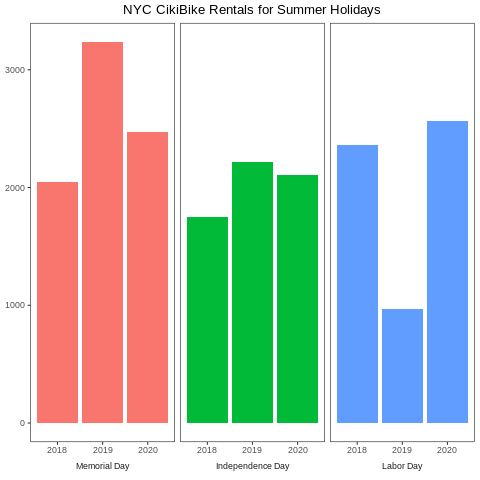

In [268]:
%%R

NYC_Holidays_CitiBikeRentals_Counts %>%
  mutate(Holiday = fct_relevel(Holiday, c("Memorial Day","Independence Day","Labor Day"))) %>%
  ggplot(aes(x = Year, y = Count,fill=Month)) +
    geom_col(position='dodge')  +
    facet_grid(~Holiday, 
             switch = "x") +
             # )+
   ggtitle("NYC CikiBike Rentals for Summer Holidays") +
    theme(legend.position = "none",
          panel.background = element_blank(),
          panel.border = element_rect(color="black",fill=NA),
          strip.placement = "outside",                      # Place facet labels outside x axis labels.
          strip.background = element_rect(fill = "white"),  # Make facet label background white.
          axis.title = element_blank(),
          plot.title = element_text(hjust = 0.5)
          ) 


https://www.wunderground.com/history/daily/us/ny/new-york-city/KLGA/date/2019-9-2 